# Matplotlib 中的对象容器

Matplotlib 是一个 Python 2D 绘图库，可以生成发布质量级别的各种硬拷贝格式和交互式环境下的图形。通过 Matplotlib，我们可以生成条形图、散点图、直方图、饼图等。

本教程将介绍 Matplotlib 中对象容器相关的概念。


In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## 对象容器 - Object Container

Matplotlib 使用一种对象容器层次结构来构建图表：`Figure` 对象是顶层容器，它包含了图表中的所有元素。在一个 `Figure` 对象中，可以包含一个或多个 `Axes` 对象。每个 `Axes` 对象又可以包含其他的对象如 `Line2D`、`Text` 等来绘制图表。

### Figure 容器

`Figure` 是最顶层的容器，它包含了图表中的所有元素。在 Figure 中，我们可以创建一个或多个 `Axes` 对象。当我们向图表添加Figure.add_subplot()或者Figure.add_axes()元素时，这些都会被添加到Figure.axes列表中

[<Axes: >, <Axes: >]


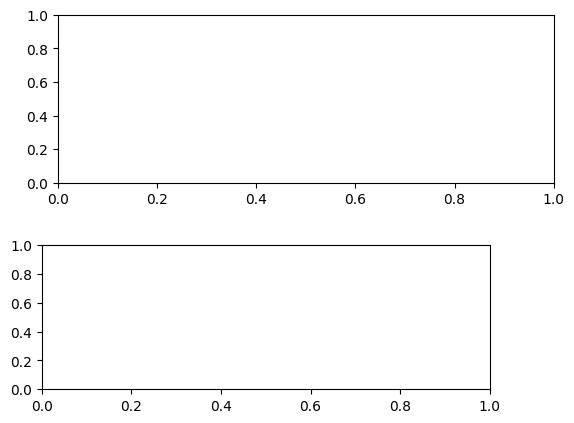

In [10]:
# 创建一个 Figure 对象
fig = plt.figure()

# 添加 Axes 对象，占 Figure 的一定比例
# [left, bottom, width, height] 以 Figure 的比例定义
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)

# 显示 Axes 对象，确保它们被添加进 Figure
print(fig.axes)

由于Figure维持了current axes，因此你不应该手动的从Figure.axes列表中添加删除元素，而是要通过Figure.add_subplot()、Figure.add_axes()来添加元素，通过Figure.delaxes()来删除元素。但是你可以迭代或者访问Figure.axes中的Axes，然后修改这个Axes的属性。

比如下面的遍历axes里的内容，并且添加网格线：

[<Axes: >, <Axes: >, <Axes: >]


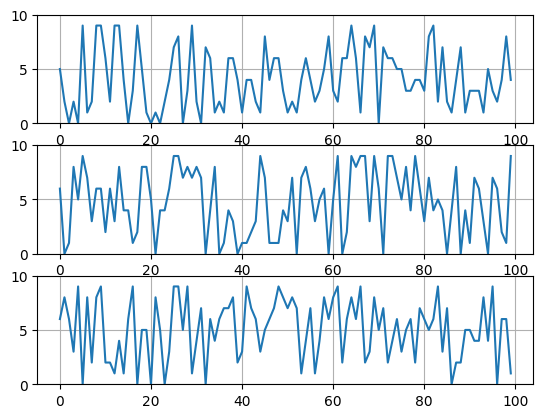

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
print(fig.axes)
for ax in fig.axes:
    ax.grid(True)
    ax.plot(np.arange(100), np.random.randint(0,10,100))
    ax.set_ylim(0, 10)

### Axes 容器

`Axes` 是图表的主要部分，几乎所有的图形元素都是在它的基础上创建的。`Axes` 包含了许多辅助方法来创建和添加图形元素（`Artist` 对象）。

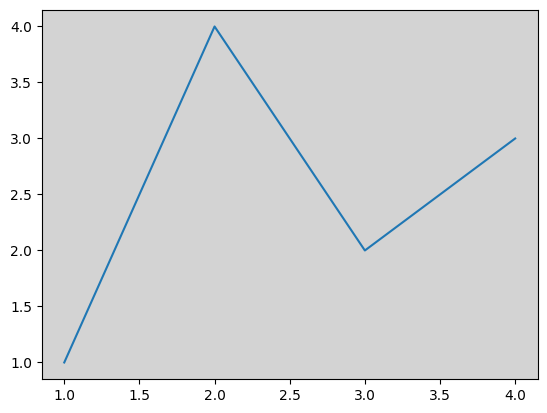

In [10]:
# 创建一个包含 Axes 的 Figure
fig, ax = plt.subplots()

# 设置 Axes 的背景颜色
ax.set_facecolor('lightgray')

# 在 Axes 上绘制简单的线条图
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.show()

Subplot就是一个特殊的Axes，其实例是位于网格中某个区域的Subplot实例。其实你也可以在任意区域创建Axes，通过Figure.add_axes([left,bottom,width,height])来创建一个任意区域的Axes，其中left,bottom,width,height都是[0—1]之间的浮点数，他们代表了相对于Figure的坐标。

另外Axes还包含两个最重要的Artist container：

ax.xaxis：XAxis对象的实例，用于处理x轴tick以及label的绘制 ax.yaxis：YAxis对象的实例，用于处理y轴tick以及label的说明。

### Axis 容器

`Axis` 对象处理图表的轴，包括刻度线、刻度标签、网格线等。每个 `Axes` 对象都有两个 `Axis` 对象：xaxis 和 yaxis。

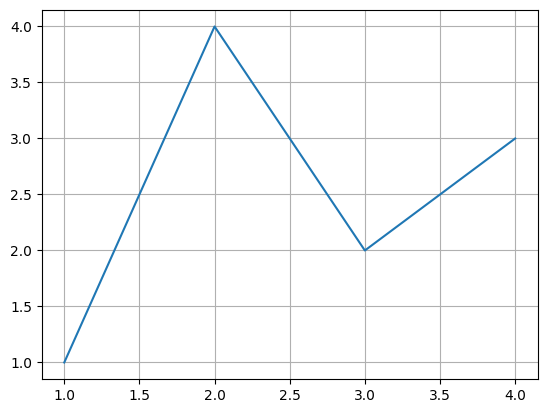

[0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
[Text(0.5, 0, '0.5'), Text(1.0, 0, '1.0'), Text(1.5, 0, '1.5'), Text(2.0, 0, '2.0'), Text(2.5, 0, '2.5'), Text(3.0, 0, '3.0'), Text(3.5, 0, '3.5'), Text(4.0, 0, '4.0'), Text(4.5, 0, '4.5')]
<a list of 18 Line2D ticklines objects>
[1. 4.]


In [18]:
# 创建一个包含 Axes 的 Figure
fig, ax = plt.subplots()

# 获取 Axes 对象的 xaxis 属性
xaxis = ax.xaxis

# 设置刻度标签的格式
xaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%0.1f'))

# 开启网格线
ax.grid(True)

ax.plot([1, 2, 3, 4], [1, 4, 2, 3])

plt.show()

axis = ax.xaxis # axis为X轴对象
print(axis.get_ticklocs())   # 获取刻度线位置
print(axis.get_ticklabels())   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
print(axis.get_ticklines())    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
print(axis.get_data_interval())# 获取轴刻度间隔

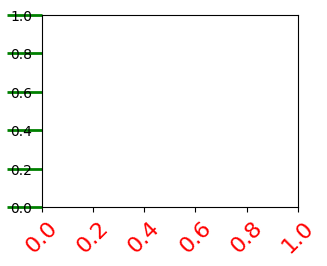

In [19]:
fig = plt.figure() # 创建一个新图表
ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，

for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_markeredgecolor('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

### Tick 容器

`Tick` 对象是 `Axis` 中的最小单位，包含刻度线、网格线和刻度标签。

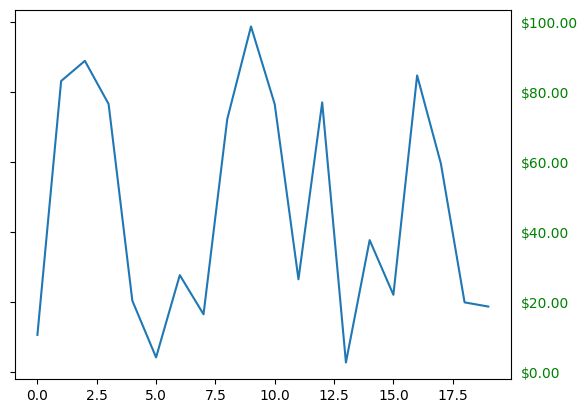

In [21]:
fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True);